In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# ============================================
# comparison for time
# ============================================

bt = pd.read_csv("backtracking_results_9x9.csv")
ca = pd.read_csv("cultural_results_9x9.csv")

comparison = pd.DataFrame({
    "puzzle_number": bt["puzzle_number"],
    "bt_time": bt["time"],
    "ca_time": ca["time"],
    "bt_valid": bt["valid"],
    "ca_valid": ca["valid"]
})

print(comparison)

    puzzle_number  bt_time   ca_time  bt_valid  ca_valid
0               1   0.0188    3.2334      True      True
1               2   0.4250  121.7558      True     False
2               3   0.0000    0.0000     False     False
3               4   0.0263   13.2732      True      True
4               5   0.0498  122.4187      True     False
5               6   2.2957  120.7824      True     False
6               7   0.0567    8.8465      True      True
7               8   0.0787   21.9207      True      True
8               9   0.0517  121.5140      True     False
9              10   0.0000    0.0000     False     False
10             11  22.0184  121.0812      True     False
11             12   0.0000    0.0000     False     False
12             13   0.0767    0.4300      True      True
13             14   0.0740  121.6407      True     False
14             15   0.0798   67.8045      True      True


In [20]:
# ============================================
# comparison for iterations
# ============================================

comparison = pd.DataFrame({
    "puzzle_number": bt["puzzle_number"],
    "bt_iterations": bt["iterations"],
    "ca_generations": ca["generations"]
})

print(comparison)


    puzzle_number  bt_iterations  ca_generations
0               1             52               7
1               2           1139              98
2               3              0               0
3               4             63              18
4               5            148              57
5               6           5565              66
6               7             73              14
7               8             75              24
8               9             71              79
9              10              0               0
10             11          45268              68
11             12              0               0
12             13             80               1
13             14             78              71
14             15             82              79


BACKTRACKING RESULTS
Total solved: 12/15

Puzzles solved:
[1, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15]

CULTURAL ALGORITHM RESULTS
Total solved: 6/15

Puzzles solved:
[1, 4, 7, 8, 13, 15]

COMPARISON
Backtracking solved but Cultural didn't: {2, 5, 6, 9, 11, 14}
Cultural solved but Backtracking didn't: set()
Both solved: {1, 4, 7, 8, 13, 15}


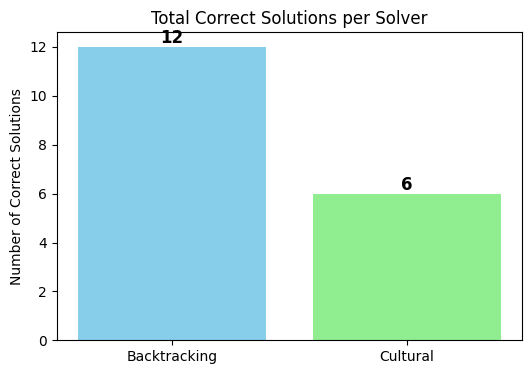

In [21]:
# ============================================
# Number of solved puzzles using every algo
# ============================================
print("=" * 60)
print("BACKTRACKING RESULTS")
print("=" * 60)
print(f"Total solved: {bt['valid'].sum()}/{len(bt)}")
print("\nPuzzles solved:")
bt_solved = bt[bt["valid"] == True]["puzzle_number"].tolist()
print(bt_solved)

print("\n" + "=" * 60)
print("CULTURAL ALGORITHM RESULTS")
print("=" * 60)
print(f"Total solved: {ca['valid'].sum()}/{len(ca)}")
print("\nPuzzles solved:")
ca_solved = ca[ca["valid"] == True]["puzzle_number"].tolist()
print(ca_solved)

# الفرق بينهم
print("\n" + "=" * 60)
print("COMPARISON")
print("=" * 60)
print(f"Backtracking solved but Cultural didn't: {set(bt_solved) - set(ca_solved)}")
print(f"Cultural solved but Backtracking didn't: {set(ca_solved) - set(bt_solved)}")
print(f"Both solved: {set(bt_solved) & set(ca_solved)}")

# الرسم البياني
total_correct = [bt["valid"].sum(), ca["valid"].sum()]
solvers = ["Backtracking", "Cultural"]

plt.figure(figsize=(6,4))
bars = plt.bar(solvers, total_correct, color=["skyblue","lightgreen"])
plt.ylabel("Number of Correct Solutions")
plt.title("Total Correct Solutions per Solver")

# إضافة الأرقام فوق الأعمدة
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

In [22]:
# ============================================
# mean time for every algo
# ============================================
print("Average time Backtracking:", bt["time"].mean())
print("Average time Cultural:", ca["time"].mean())


Average time Backtracking: 1.68344
Average time Cultural: 56.31340666666666


In [23]:
# ============================================
# mean iterations for every algo
# ============================================
print("Average Backtracking iterations:", bt["iterations"].mean())
print("Average Cultural generations:", ca["generations"].mean())


Average Backtracking iterations: 3512.9333333333334
Average Cultural generations: 38.8


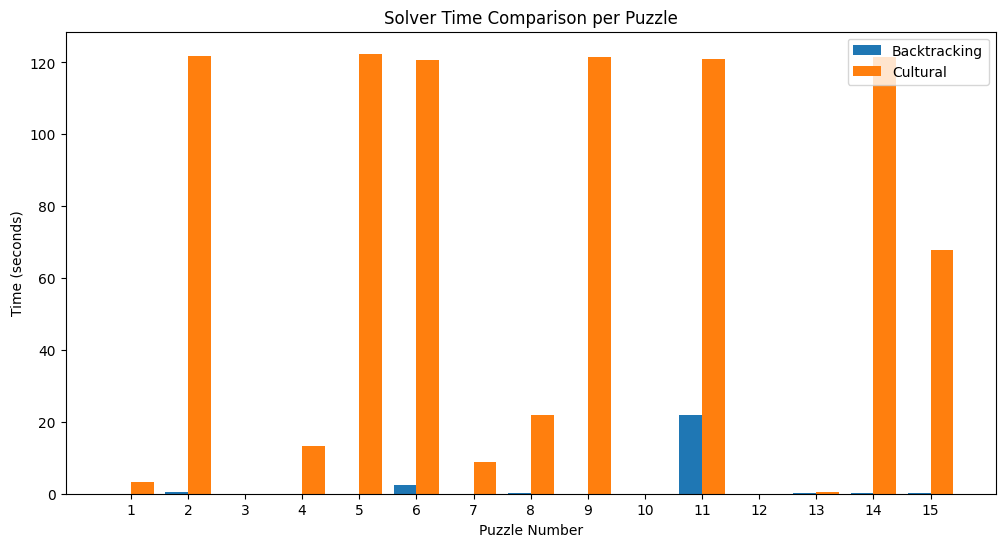

In [24]:
# ============================================
# time visualization
# ============================================
plt.figure(figsize=(12,6))
x = np.arange(len(bt))  # الألغاز
plt.bar(x - 0.2, bt["time"], width=0.4, label="Backtracking")
plt.bar(x + 0.2, ca["time"], width=0.4, label="Cultural")
plt.xlabel("Puzzle Number")
plt.ylabel("Time (seconds)")
plt.title("Solver Time Comparison per Puzzle")
plt.xticks(x, bt["puzzle_number"])
plt.legend()
plt.show()


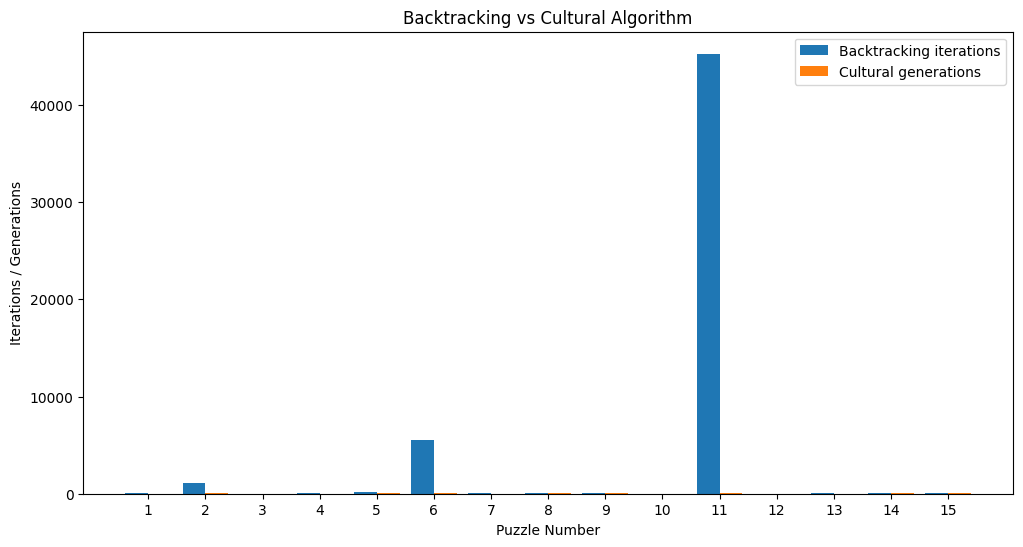

In [25]:
# ============================================
# iterations visualization
# ============================================

x = np.arange(len(bt))
plt.figure(figsize=(12,6))
plt.bar(x - 0.2, bt["iterations"], width=0.4, label="Backtracking iterations")
plt.bar(x + 0.2, ca["generations"], width=0.4, label="Cultural generations")
plt.xlabel("Puzzle Number")
plt.ylabel("Iterations / Generations")
plt.title("Backtracking vs Cultural Algorithm")
plt.xticks(x, bt["puzzle_number"])
plt.legend()
plt.show()